In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime, timedelta
import calendar

            Price
Timestamp        
2014-03-31  40261
2014-04-30  38537
2014-05-31  38573
2014-06-30  37605
2014-07-31  37271
...           ...
2018-11-30  62298
2018-12-31  63405
2019-01-31  64663
2019-02-28  65473
2019-03-31  65253

[61 rows x 1 columns]
最优模型:                             Statespace Model Results                           
Dep. Variable:                  Price   No. Observations:                   61
Model:               SARIMAX(4, 1, 4)   Log Likelihood                -464.138
Date:                Mon, 27 Apr 2020   AIC                            946.276
Time:                        12:10:25   BIC                            964.342
Sample:                    03-31-2014   HQIC                           953.262
                         - 03-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

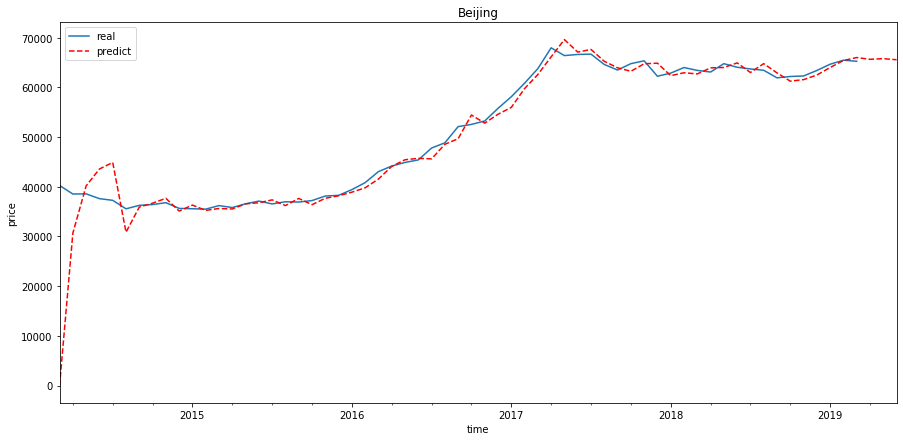

In [36]:
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

# 北京房价
# 数据加载
df = pd.read_excel('./Prices.xlsx')
df = df[['时间(年-月)', '供给(元/㎡)']]
df.columns = ['Timestamp', 'Price']
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
df_month = df.resample('M').mean()
print(df_month)
# 设置参数范围
ps = range(0, 5)
qs = range(0, 5)
ds = range(1, 2)
parameters = product(ps, ds, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        #model = ARIMA(df_month.Price,order=(param[0], param[1], param[2])).fit()
        # SARIMAX 包含季节趋势因素的ARIMA模型
        model = sm.tsa.statespace.SARIMAX(df_month.Price,
                                order=(param[0], param[1], param[2]),
                                #seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
print('最优模型: ', best_model.summary())
# 设置future_month，需要预测的时间date_list
df_month2 = df_month[['Price']]
future_month = 3
last_month = pd.to_datetime(df_month2.index[len(df_month2)-1])
date_list = []
for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year
    month = last_month.month
    if month == 12:
        month = 1
        year = year+1
    else:
        month = month + 1
    next_month_days = calendar.monthrange(year, month)[1]
    #print(next_month_days)
    last_month = last_month + timedelta(days=(next_month_days)) 
    date_list.append(last_month)
print('date_list=', date_list)
# 添加未来要预测的3个月
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])

# get_prediction得到的是区间，使用predicted_mean
df_month2['forecast'] = best_model.get_prediction(start=0, end=len(df_month2)).predicted_mean

# 房价预测结果显示
plt.figure(figsize=(15,7))
df_month2.Price.plot(label='real')
df_month2.forecast.plot(color='r', ls='--', label='predict')
plt.legend()
plt.title('Beijing')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

            Price
Timestamp        
2014-03-31  26640
2014-04-30  27245
2014-05-31  26951
2014-06-30  26678
2014-07-31  25832
...           ...
2018-11-30  57636
2018-12-31  60305
2019-01-31  60775
2019-02-28  61574
2019-03-31  62418

[61 rows x 1 columns]
最优模型:                             Statespace Model Results                           
Dep. Variable:                  Price   No. Observations:                   61
Model:               SARIMAX(0, 1, 4)   Log Likelihood                -499.873
Date:                Mon, 27 Apr 2020   AIC                           1009.746
Time:                        12:11:20   BIC                           1019.782
Sample:                    03-31-2014   HQIC                          1013.627
                         - 03-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

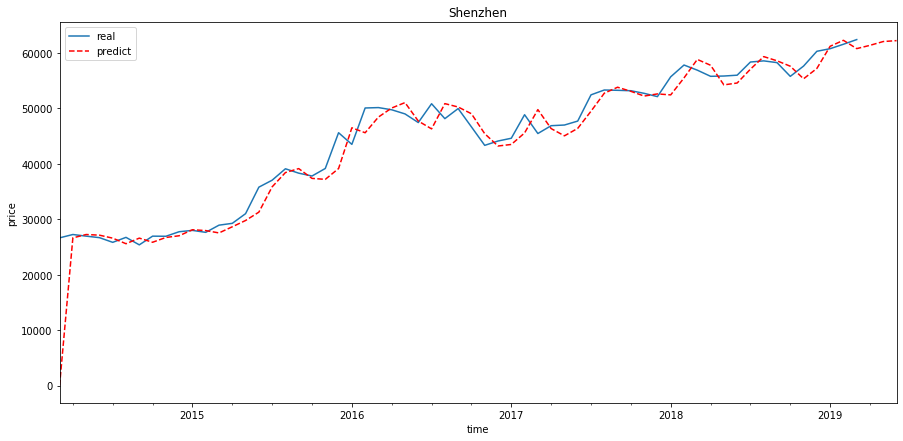

In [37]:
df = pd.read_excel('./Prices.xlsx',sheet_name='sz')
df = df[['时间(年-月)', '供给(元/㎡)']]
df.columns = ['Timestamp', 'Price']
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
df_month = df.resample('M').mean()
print(df_month)
# 设置参数范围
ps = range(0, 5)
qs = range(0, 5)
ds = range(1, 2)
parameters = product(ps, ds, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        #model = ARIMA(df_month.Price,order=(param[0], param[1], param[2])).fit()
        # SARIMAX 包含季节趋势因素的ARIMA模型
        model = sm.tsa.statespace.SARIMAX(df_month.Price,
                                order=(param[0], param[1], param[2]),
                                #seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
print('最优模型: ', best_model.summary())
# 设置future_month，需要预测的时间date_list
df_month2 = df_month[['Price']]
future_month = 3
last_month = pd.to_datetime(df_month2.index[len(df_month2)-1])
date_list = []
for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year
    month = last_month.month
    if month == 12:
        month = 1
        year = year+1
    else:
        month = month + 1
    next_month_days = calendar.monthrange(year, month)[1]
    #print(next_month_days)
    last_month = last_month + timedelta(days=(next_month_days)) 
    date_list.append(last_month)
print('date_list=', date_list)
# 添加未来要预测的3个月
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])

# get_prediction得到的是区间，使用predicted_mean
df_month2['forecast'] = best_model.get_prediction(start=0, end=len(df_month2)).predicted_mean

# 房价预测结果显示
plt.figure(figsize=(15,7))
df_month2.Price.plot(label='real')
df_month2.forecast.plot(color='r', ls='--', label='predict')
plt.legend()
plt.title('Shenzhen')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

            Price
Timestamp        
2014-03-31  29405
2014-04-30  30211
2014-05-31  30432
2014-06-30  29898
2014-07-31  30709
...           ...
2018-11-30  51620
2018-12-31  52087
2019-01-31  53166
2019-02-28  53234
2019-03-31  52278

[61 rows x 1 columns]
最优模型:                             Statespace Model Results                           
Dep. Variable:                  Price   No. Observations:                   61
Model:               SARIMAX(3, 1, 4)   Log Likelihood                -459.605
Date:                Mon, 27 Apr 2020   AIC                            935.210
Time:                        12:12:32   BIC                            951.269
Sample:                    03-31-2014   HQIC                           941.420
                         - 03-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

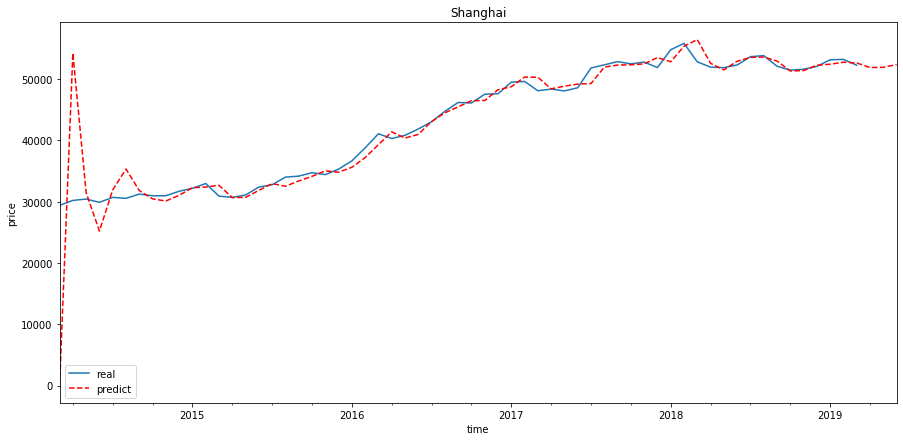

In [38]:
df = pd.read_excel('./Prices.xlsx',sheet_name='sh')
df = df[['时间(年-月)', '供给(元/㎡)']]
df.columns = ['Timestamp', 'Price']
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
df_month = df.resample('M').mean()
print(df_month)
# 设置参数范围
ps = range(0, 5)
qs = range(0, 5)
ds = range(1, 2)
parameters = product(ps, ds, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        #model = ARIMA(df_month.Price,order=(param[0], param[1], param[2])).fit()
        # SARIMAX 包含季节趋势因素的ARIMA模型
        model = sm.tsa.statespace.SARIMAX(df_month.Price,
                                order=(param[0], param[1], param[2]),
                                #seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
print('最优模型: ', best_model.summary())
# 设置future_month，需要预测的时间date_list
df_month2 = df_month[['Price']]
future_month = 3
last_month = pd.to_datetime(df_month2.index[len(df_month2)-1])
date_list = []
for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year
    month = last_month.month
    if month == 12:
        month = 1
        year = year+1
    else:
        month = month + 1
    next_month_days = calendar.monthrange(year, month)[1]
    #print(next_month_days)
    last_month = last_month + timedelta(days=(next_month_days)) 
    date_list.append(last_month)
print('date_list=', date_list)
# 添加未来要预测的3个月
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])

# get_prediction得到的是区间，使用predicted_mean
df_month2['forecast'] = best_model.get_prediction(start=0, end=len(df_month2)).predicted_mean

# 房价预测结果显示
plt.figure(figsize=(15,7))
df_month2.Price.plot(label='real')
df_month2.forecast.plot(color='r', ls='--', label='predict')
plt.legend()
plt.title('Shanghai')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

            Price
Timestamp        
2014-03-31  18758
2014-04-30  18774
2014-05-31  18315
2014-06-30  18673
2014-07-31  18181
...           ...
2018-11-30  32852
2018-12-31  33036
2019-01-31  33790
2019-02-28  33393
2019-03-31  33684

[61 rows x 1 columns]
最优模型:                             Statespace Model Results                           
Dep. Variable:                  Price   No. Observations:                   61
Model:               SARIMAX(0, 1, 4)   Log Likelihood                -437.194
Date:                Mon, 27 Apr 2020   AIC                            884.387
Time:                        12:13:18   BIC                            894.424
Sample:                    03-31-2014   HQIC                           888.268
                         - 03-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

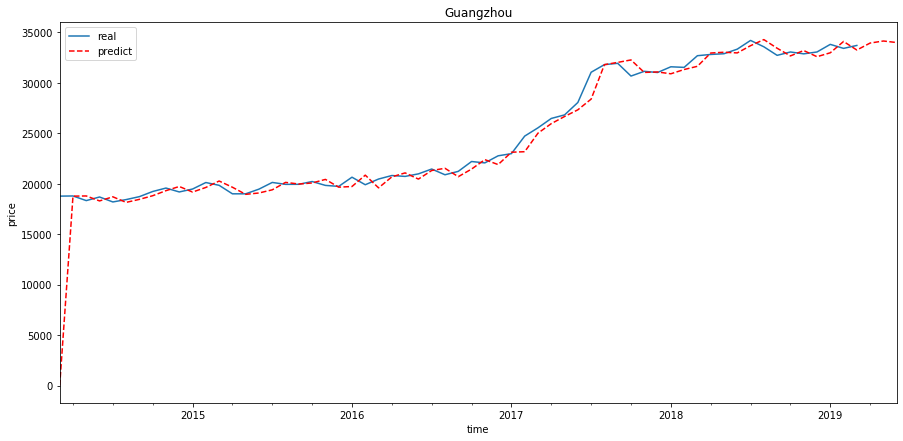

In [39]:
df = pd.read_excel('./Prices.xlsx',sheet_name='gz')
df = df[['时间(年-月)', '供给(元/㎡)']]
df.columns = ['Timestamp', 'Price']
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
df_month = df.resample('M').mean()
print(df_month)
# 设置参数范围
ps = range(0, 5)
qs = range(0, 5)
ds = range(1, 2)
parameters = product(ps, ds, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        #model = ARIMA(df_month.Price,order=(param[0], param[1], param[2])).fit()
        # SARIMAX 包含季节趋势因素的ARIMA模型
        model = sm.tsa.statespace.SARIMAX(df_month.Price,
                                order=(param[0], param[1], param[2]),
                                #seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
print('最优模型: ', best_model.summary())
# 设置future_month，需要预测的时间date_list
df_month2 = df_month[['Price']]
future_month = 3
last_month = pd.to_datetime(df_month2.index[len(df_month2)-1])
date_list = []
for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year
    month = last_month.month
    if month == 12:
        month = 1
        year = year+1
    else:
        month = month + 1
    next_month_days = calendar.monthrange(year, month)[1]
    #print(next_month_days)
    last_month = last_month + timedelta(days=(next_month_days)) 
    date_list.append(last_month)
print('date_list=', date_list)
# 添加未来要预测的3个月
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])

# get_prediction得到的是区间，使用predicted_mean
df_month2['forecast'] = best_model.get_prediction(start=0, end=len(df_month2)).predicted_mean

# 房价预测结果显示
plt.figure(figsize=(15,7))
df_month2.Price.plot(label='real')
df_month2.forecast.plot(color='r', ls='--', label='predict')
plt.legend()
plt.title('Guangzhou')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

            Price
Timestamp        
2014-03-31   8535
2014-04-30   8670
2014-05-31   8685
2014-06-30   8596
2014-07-31   8508
...           ...
2018-11-30  16297
2018-12-31  16113
2019-01-31  15947
2019-02-28  16514
2019-03-31  16508

[61 rows x 1 columns]
最优模型:                             Statespace Model Results                           
Dep. Variable:                  Price   No. Observations:                   61
Model:               SARIMAX(1, 1, 4)   Log Likelihood                -391.396
Date:                Mon, 27 Apr 2020   AIC                            794.792
Time:                        12:20:32   BIC                            806.836
Sample:                    03-31-2014   HQIC                           799.450
                         - 03-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

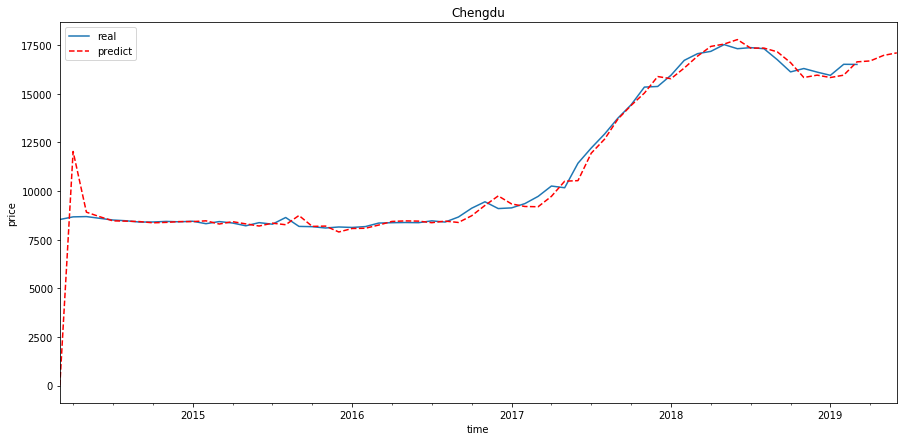

In [40]:
df = pd.read_excel('./Prices.xlsx',sheet_name='cd')
df = df[['时间(年-月)', '供给(元/㎡)']]
df.columns = ['Timestamp', 'Price']
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
df_month = df.resample('M').mean()
print(df_month)
# 设置参数范围
ps = range(0, 5)
qs = range(0, 5)
ds = range(1, 2)
parameters = product(ps, ds, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        #model = ARIMA(df_month.Price,order=(param[0], param[1], param[2])).fit()
        # SARIMAX 包含季节趋势因素的ARIMA模型
        model = sm.tsa.statespace.SARIMAX(df_month.Price,
                                order=(param[0], param[1], param[2]),
                                #seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
print('最优模型: ', best_model.summary())
# 设置future_month，需要预测的时间date_list
df_month2 = df_month[['Price']]
future_month = 3
last_month = pd.to_datetime(df_month2.index[len(df_month2)-1])
date_list = []
for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year
    month = last_month.month
    if month == 12:
        month = 1
        year = year+1
    else:
        month = month + 1
    next_month_days = calendar.monthrange(year, month)[1]
    #print(next_month_days)
    last_month = last_month + timedelta(days=(next_month_days)) 
    date_list.append(last_month)
print('date_list=', date_list)
# 添加未来要预测的3个月
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])

# get_prediction得到的是区间，使用predicted_mean
df_month2['forecast'] = best_model.get_prediction(start=0, end=len(df_month2)).predicted_mean

# 房价预测结果显示
plt.figure(figsize=(15,7))
df_month2.Price.plot(label='real')
df_month2.forecast.plot(color='r', ls='--', label='predict')
plt.legend()
plt.title('Chengdu')
plt.xlabel('time')
plt.ylabel('price')
plt.show()